In [52]:
from numpy import *
import pandas as pd

In [31]:
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [32]:
def sigmod(inX):
    return 1.0/(1+exp(-inX))

In [33]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n, 1))
    for k in range(maxCycles):
        h = sigmod(dataMatrix*weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose()*error
    return weights
        

In [41]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(array(dataArr), labelMat)

In [42]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    

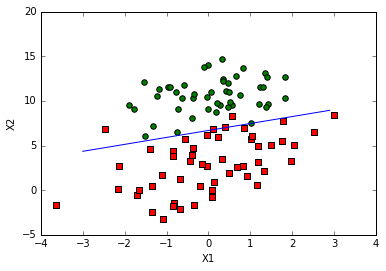

In [43]:
plotBestFit(weights.getA())

In [44]:
def stoGradAscent0(dataMatrix, classlabel):
    m, n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range (m):
        h = sigmod(sum(dataMatrix[i]*weights))
        error = classlabel[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights


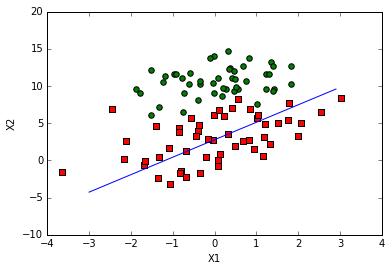

In [45]:
weights = stoGradAscent0(array(dataArr), labelMat)
plotBestFit(weights)

In [47]:
def stoGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+i+j) + 0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmod(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

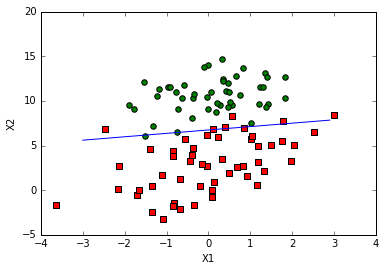

In [49]:
weights = stoGradAscent1(array(dataArr), labelMat)
plotBestFit(weights)

In [50]:
def classifyVector(inX, weights):
    prob = sigmod(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

In [65]:
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stoGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights) != int(currLine[21])):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print errorRate
    return errorRate
            

In [66]:
def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print errorSum/float(numTests)

In [67]:
multiTest()

0.462686567164
0.34328358209
0.34328358209
0.388059701493
0.388059701493
0.402985074627
0.432835820896
0.313432835821
0.373134328358
0.358208955224
0.380597014925
